##### Бронников Максим Андреевич
##### М8О-407Б-17

<h1><center> Сети с обратными связями </center></h1>

**Целью работы** является исследование свойств сетей Хопфилда, Хэмминга и Элмана, алгоритмов обучения, а также применение сетей в задачах распознавания статических и динамических образов.

In [37]:
import neurolab as nl
import numpy as np
import numpy.matlib
from neupy import algorithms
from scipy.spatial import distance
import pylab as pl
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

**Вариант №4:** 

1) $g(k) = \sin{(\sin{(k)} k^3 - 10)}, \; \forall k \in [1.56, 3.12], \;$ $R = [0, 1, 5]$

2) $[6, 3, 9]$

### Описание

**Нейронная сеть Элмана**

Сеть обладает скрытым слоем и производит расчет выходного слоя для $t$-го входного вектора по следующим формулам:

$$y_t = \sigma_y (W_y x_t + U_y y_{t - 1} + b_y)$$

$$z_t = \sigma_z (W_z y_t + b_z)$$

Обозначения переменных и функций:

- $x_t$ - вектор входного слоя
- $y_t$ - вектор скрытого слоя
- $z_t$ -  вектор выходного слоя
- $W, U, b$ - матрицы весов и вектор смещений
- $\sigma_y,\sigma_z$ - функция активации

<img src="https://neerc.ifmo.ru/wiki/images/thumb/d/dc/Elman_RNN.jpg/450px-Elman_RNN.jpg">

**Нейронная сеть Хопфилда**

Каждый нейрон слоя из $n$ нейронов связывается обратными связями с остальными $n - 1$ нейронами этого слоя. Сеть позволяет корректировать искаженные образы.

Веса этого слоя могут быть получены с помощью аналитической формулы:

$$W = \displaystyle\frac{1}{N} \sum\limits_{i = i}^{N} <x_i, x_i>$$

<img src="https://habrastorage.org/getpro/geektimes/post_images/55e/b70/8c4/55eb708c4b9952a974a5e04ff226f64c.jpg">

**Нейронная сеть Хэмминга**

Сеть состоит из *полносвязанного слоя* вместе со *слоем сети Хопфилда*. Сеть позволяет классифицировать образы, поданные на вход.

Веса полносвязного слоя могут быть найдены также аналитическим путем.

<img src="http://www.codenet.ru/progr/alg/ai/img/image43.gif">

### Задание №1

Использовать *сеть Элмана* для распознавания динамических образов.

Формируем входные данные для *сети Элмана*

In [2]:
p1_k = np.linspace(0, 1, int(1 / 0.025), endpoint=True)

# main signal
p1 = np.sin(4 * np.pi * p1_k)

t1 = np.ones(len(p1_k)) * (-1)


p2_k = np.linspace(1.56, 3.12, int(3.12 / 0.025), endpoint=True)

# predict signal
p2 = np.sin(np.sin(p2_k) * p2_k * p2_k * p2_k - 10)

t2 = np.ones(len(p2_k))

# delay
R = np.array([0, 1, 5])

In [3]:
p2 = p2.reshape(1, p2.shape[0])
t2 = t2.reshape(1, t2.shape[0])

In [4]:
P = np.concatenate((numpy.matlib.repmat(p1, 1, R[0]), p2,
                    numpy.matlib.repmat(p1, 1, R[1]), p2,
                    numpy.matlib.repmat(p1, 1, R[2]), p2), axis=1).reshape(-1, 1)

T = np.concatenate((numpy.matlib.repmat(t1, 1, R[0]), t2,
                    numpy.matlib.repmat(t1, 1, R[1]), t2,
                    numpy.matlib.repmat(t1, 1, R[2]), t2), axis=1).reshape(-1, 1)

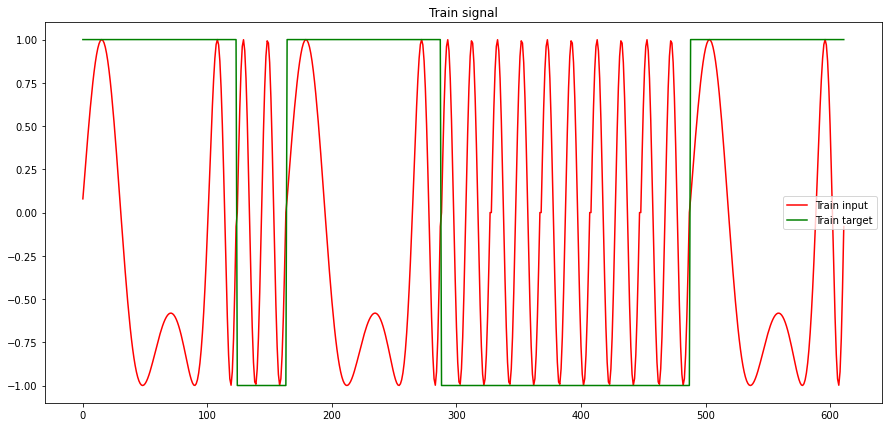

In [5]:
plt.figure(figsize=(15, 7))
plt.plot(P.reshape(P.shape[0]), color='red')
plt.plot(T.reshape(T.shape[0]), color='green')
plt.legend(['Train input', 'Train target'])
plt.title("Train signal")
plt.show()

Создаем сеть с 2 слоями. Число нейронов скрытого слоя - $8$. Для скрытого и выходного слоев используем *tansig* в качестве активационной функции.

In [6]:
# Create network with 2 layers
net = nl.net.newelm([[-10, 10]], [8, 1], [nl.trans.TanSig(), nl.trans.TanSig()])
# Set initialized functions and init
net.layers[0].np['w'][:] = 1 # set weight for all input neurons to 1
net.layers[0].np['b'][:] = 0 # set bias for all input neurons to 0
net.init()

Обучаем сеть и вычисляем метрики обучения, ошибка MSE.

In [7]:
# Train network, error - MSE
error = net.train(P, T, epochs=250, show=50, goal=0.0001)

Epoch: 50; Error: 0.9272795201843145;
Epoch: 100; Error: 0.9211192340853033;
Epoch: 150; Error: 0.9057625065216379;
Epoch: 200; Error: 0.9246592007672322;
Epoch: 250; Error: 0.9262906781629441;
The maximum number of train epochs is reached


Рассчитаем выход сети для обучающего подмножества.

In [8]:
# Compute output
output = net.sim(P)

Отобразим ошибку обучения на графике

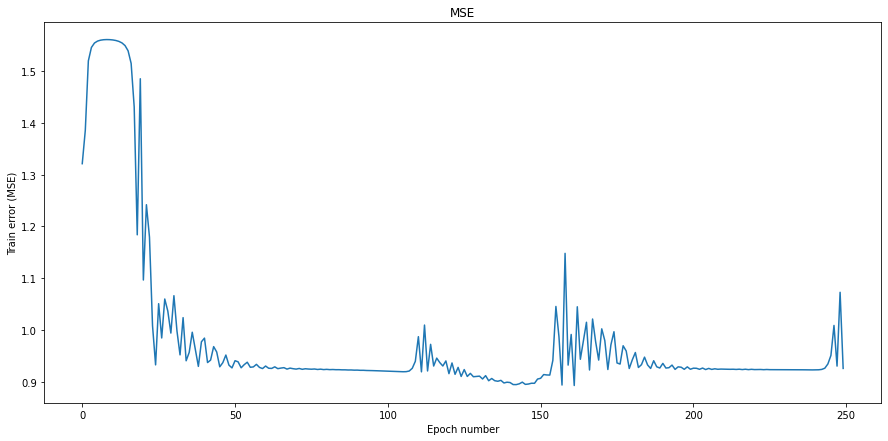

In [9]:
plt.figure(figsize=(15, 7))
plt.plot(error)
plt.xlabel('Epoch number')
plt.ylabel('Train error (MSE)')
plt.title("MSE")
plt.show()

Отобразим на графике этаонные значения и предсказанные сетью.

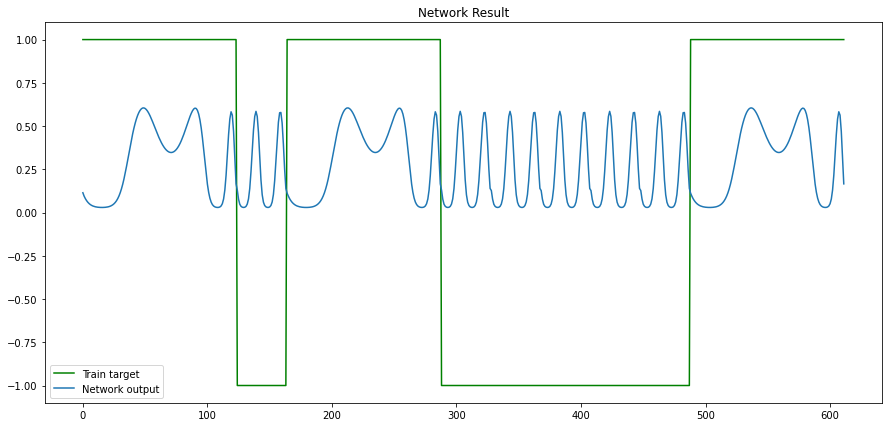

In [10]:
plt.figure(figsize=(15, 7))
plt.plot(T.reshape(T.shape[0]), color='green')
plt.plot(output.reshape(output.shape[0]))
plt.legend(['Train target', 'Network output'])
plt.title("Network Result")
plt.show()

Предсказанные значения:

In [11]:
output[output >= 0] = 1.0
output[output < 0] = -1.0

MSE = mean_squared_error(T, output)
print('MSE = {}'.format(MSE))
print('RMSE = {}'.format(np.sqrt(MSE)))

MSE = 1.5686274509803921
RMSE = 1.2524485821702989


Для проверки качества распознавания сформируем новое обучающее множество, изменив одно из значений R.

In [12]:
p1_k = np.linspace(0, 1, int(1 / 0.025), endpoint=True)

# main signal
p1 = np.sin(4 * np.pi * p1_k)

t1 = np.ones(len(p1_k)) * (-1)


p2_k = np.linspace(1.56, 3.12, int(3.12 / 0.025), endpoint=True)

# predict signal
p2 = np.sin(np.sin(p2_k) * p2_k * p2_k * p2_k - 10)

t2 = np.ones(len(p2_k))

# delay
R = np.array([0, 1, 15])

In [13]:
p2 = p2.reshape(1, p2.shape[0])
t2 = t2.reshape(1, t2.shape[0])

P2 = np.concatenate((numpy.matlib.repmat(p1, 1, R[0]), p2,
                    numpy.matlib.repmat(p1, 1, R[1]), p2,
                    numpy.matlib.repmat(p1, 1, R[2]), p2), axis=1).reshape(-1, 1)

T2 = np.concatenate((numpy.matlib.repmat(t1, 1, R[0]), t2,
                    numpy.matlib.repmat(t1, 1, R[1]), t2,
                    numpy.matlib.repmat(t1, 1, R[2]), t2), axis=1).reshape(-1, 1)

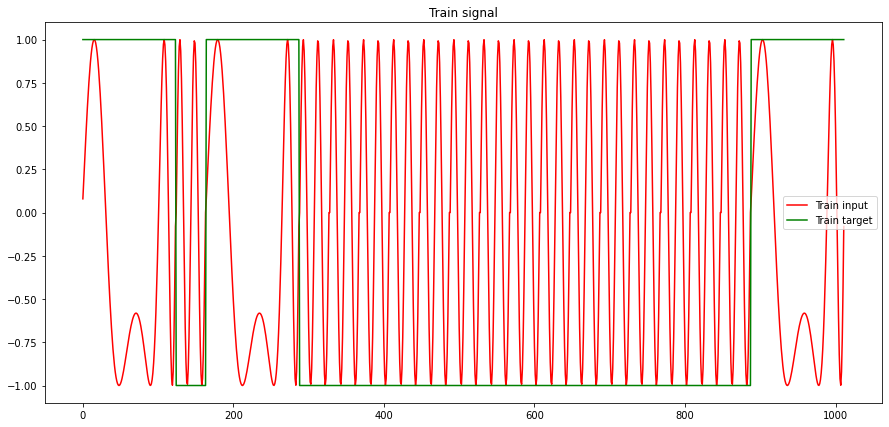

In [14]:
plt.figure(figsize=(15, 7))
plt.plot(P2.reshape(P2.shape[0]), color='red')
plt.plot(T2.reshape(T2.shape[0]), color='green')
plt.legend(['Train input', 'Train target'])
plt.title("Train signal")
plt.show()

Рассчитать выход сети для обучающего подмножества.

In [15]:
# Network output
output2 = net.sim(P2)

Отобразим на графике эталонные значения и предсказанные сетью.

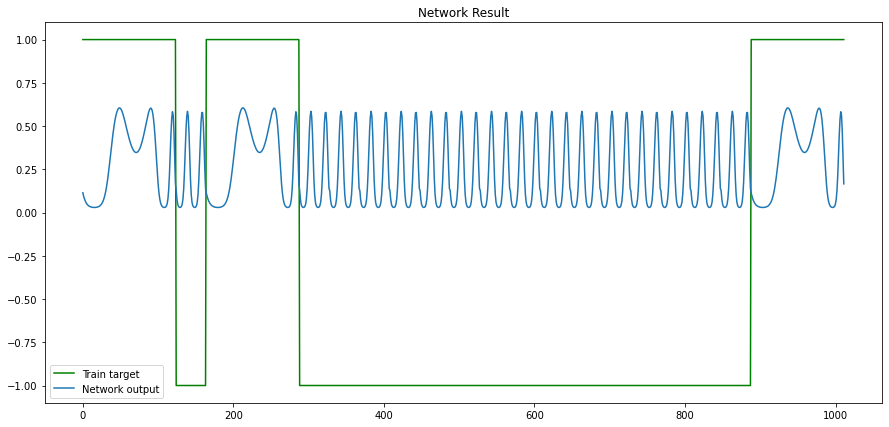

In [16]:
plt.figure(figsize=(15, 7))
plt.plot(T2.reshape(T2.shape[0]), color='green')
plt.plot(output2.reshape(output2.shape[0]))
plt.legend(['Train target', 'Network output'])
plt.title("Network Result")
plt.show()

Предсказанные значения:

In [17]:
output[output >= 0] = 1.0
output[output < 0] = -1.0

MSE = mean_squared_error(T, output)
print('MSE = {}'.format(MSE))
print('RMSE = {}'.format(np.sqrt(MSE)))

MSE = 1.5686274509803921
RMSE = 1.2524485821702989


### Задание №2

Использовать *сеть Хопфилда* для распознавания статических образов.

Формируем входные данные для *сети Хопфилда*

Цветам точек соответствуют 0 и 1.

In [18]:
zero = np.matrix([
               0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
               0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
               0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
               0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
               0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
               0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
               0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
               0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
               0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
               0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
               0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
               0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
       
one = np.matrix([
                0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
                0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
                0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
                0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
                0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
                0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
                0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
                0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
                0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
                0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
                0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
                0, 0, 0, 1, 1, 1, 1, 0, 0, 0])
       
two = np.matrix([
                1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
                1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
                0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
                0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
                0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
                1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
                1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
                1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
                1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
                1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
                1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
                1, 1, 1, 1, 1, 1, 1, 1, 0, 0])
    
three = np.matrix([
                0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
                0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
                0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
                0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
                0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
                0, 0, 1, 1, 1, 1, 1, 1, 0, 0])
       
four = np.matrix([
                0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
                0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
                0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
                0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
                0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
                0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
                0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 0])

six = np.matrix([
                1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
                1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
                1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
                1, 0, 0, 0, 0, 0, 0, 0, 0,
                1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
                1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
                1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
                1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
                1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
                1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
                1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
                1, 1, 1, 1, 1, 1, 0, 0, 0, 0])
       
nine = np.matrix([
                0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
                0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
                0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
                0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
                0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
                0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
                0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
                0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
                0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
                0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
                0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
                0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

Для синтеза сети объединим эталонные образы.

Число итераций - 600.

In [19]:
data = np.concatenate([six, three, nine], axis=0)

hopf = algorithms.DiscreteHopfieldNetwork(mode='async', n_times=600)
hopf.train(data)

Подаем в сеть первый образ.

In [20]:
result = hopf.predict(six)

Результат сети:

In [21]:
def draw_image(img):
    for row in img.tolist():
        print(' '.join(' #'[val] for val in row))

Эталонный образ

In [22]:
draw_image(six.reshape(12,10))

# # # # # #        
# # # # # #        
# #                
# #                
# # # # # #        
# # # # # #        
# #     # #        
# #     # #        
# #     # #        
# #     # #        
# # # # # #        
# # # # # #        


Результат коррекции сети:

In [23]:
draw_image(result.reshape(12, 10))

# # # # # #        
# # # # # #        
# #                
# #                
# # # # # #        
# # # # # #        
# #     # #        
# #     # #        
# #     # #        
# #     # #        
# # # # # #        
# # # # # #        


Функция для зашумления образа:

In [24]:
def make_noise(img, noise_percent):
    limit = img.shape[1]
    tmp = img.T
    
    for i in range(noise_percent):
        pos = np.random.randint(1, limit, 1)[0]
        tmp[pos] *= 0
    res = tmp.T
    return res

Зашумление второго образа на 20%:

In [25]:
noise_three = make_noise(three, 20)
draw_image(noise_three.reshape(12, 10))

    # #   # # #    
    # # # # #   #  
              # #  
              # #  
              # #  
        #   # #    
        # # # #    
              # #  
              # #  
              # #  
    # # # #   # #  
    #   # # #      


Результат коррекции сети:

In [26]:
result = hopf.predict(noise_three)
draw_image(result.reshape(12, 10))

    # # # # # #    
    # # # # # # #  
              # #  
              # #  
              # #  
        # # # #    
        # # # #    
              # #  
              # #  
              # #  
    # # # # # # #  
    # # # # # #    


Зашумление третьего образа на 30%:

In [27]:
noise_nine = make_noise(nine, 30)
draw_image(noise_nine.reshape(12, 10))

        # # # # # #
        # # # # # #
        #       #  
        # #     # #
        # #       #
        # #       #
        # #   #    
          #   # # #
                #  
                # #
        # #   # #  
        #   # # # #


Результат коррекции сети:

In [28]:
result = hopf.predict(noise_nine)
draw_image(result.reshape(12, 10))

        # # # # # #
        # # # # # #
        # #     # #
        # #     # #
        # #     # #
        # #     # #
        # # # # # #
        # # # # # #
                # #
                # #
        # # # # # #
        # # # # # #


### Задание №3

Использовать *сеть Хэмминга* для распознавания статических образов.

Формируем входные данные для *сети Хэмминга*.

Цветам точек соответствуют -1 и 1.

In [29]:
zero = np.array([
               -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
               -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
               -1, -1, 1, 1, 1, 1, 1, 1, -1, -1,
               -1, 1, 1, 1, -1, -1, 1, 1, 1, -1,
               -1, 1, 1, 1, -1, -1, 1, 1, 1, -1,
               -1, 1, 1, 1, -1, -1, 1, 1, 1, -1,
               -1, 1, 1, 1, -1, -1, 1, 1, 1, -1,
               -1, 1, 1, 1, -1, -1, 1, 1, 1, -1,
               -1, 1, 1, 1, -1, -1, 1, 1, 1, -1,
               -1, -1, 1, 1, 1, 1, 1, 1, -1, -1,
               -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
               -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])
       
one = np.array([
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1])
       
two = np.array([
                1, 1, 1, 1, 1, 1, 1, 1, -1, -1,
                1, 1, 1, 1, 1, 1, 1, 1, -1, -1,
                -1, -1, -1, -1, -1, -1, 1, 1, -1, -1,
                -1, -1, -1, -1, -1, -1, 1, 1, -1, -1,
                -1, -1, -1, -1, -1, -1, 1, 1, -1, -1,
                1, 1, 1, 1, 1, 1, 1, 1, -1, -1,
                1, 1, 1, 1, 1, 1, 1, 1, -1, -1,
                1, 1, -1, -1, -1, -1, -1, -1, -1, -1,
                1, 1, -1, -1, -1, -1, -1, -1, -1, -1,
                1, 1, -1, -1, -1, -1, -1, -1, -1, -1,
                1, 1, 1, 1, 1, 1, 1, 1, -1, -1,
                1, 1, 1, 1, 1, 1, 1, 1, -1, -1])
    
three = np.array([
                -1, -1, 1, 1, 1, 1, 1, 1, -1, -1,
                -1, -1, 1, 1, 1, 1, 1, 1, 1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,
                -1, -1, -1, -1, 1, 1, 1, 1, -1, -1,
                -1, -1, -1, -1, 1, 1, 1, 1, -1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,
                -1, -1, 1, 1, 1, 1, 1, 1, 1, -1,
                -1, -1, 1, 1, 1, 1, 1, 1, -1, -1])
       
four = np.array([
                -1, 1, 1, -1, -1, -1, -1, 1, 1, -1,
                -1, 1, 1, -1, -1, -1, -1, 1, 1, -1,
                -1, 1, 1, -1, -1, -1, -1, 1, 1, -1,
                -1, 1, 1, -1, -1, -1, -1, 1, 1, -1,
                -1, 1, 1, -1, -1, -1, -1, 1, 1, -1,
                -1, 1, 1, 1, 1, 1, 1, 1, 1, -1,
                -1, 1, 1, 1, 1, 1, 1, 1, 1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1])

six = np.array([
                1, 1, 1, 1, 1, 1, -1, -1, -1, -1,
                1, 1, 1, 1, 1, 1, -1, -1, -1, -1, 1,
                1, -1, -1, -1, -1, -1, -1, -1, -1, 1,
                1, -1, -1, -1, -1, -1, -1, -1, -1,
                1, 1, 1, 1, 1, 1, -1, -1, -1, -1,
                1, 1, 1, 1, 1, 1, -1, -1, -1, -1,
                1, 1, -1, -1, 1, 1, -1, -1, -1, -1,
                1, 1, -1, -1, 1, 1, -1, -1, -1, -1,
                1, 1, -1, -1, 1, 1, -1, -1, -1, -1,
                1, 1, -1, -1, 1, 1, -1, -1, -1, -1,
                1, 1, 1, 1, 1, 1, -1, -1, -1, -1,
                1, 1, 1, 1, 1, 1, -1, -1, -1, -1])
       
nine = np.array([
                -1, -1, -1, -1, 1, 1, 1, 1, 1, 1,
                -1, -1, -1, -1, 1, 1, 1, 1, 1, 1,
                -1, -1, -1, -1, 1, 1, -1, -1, 1, 1,
                -1, -1, -1, -1, 1, 1, -1, -1, 1, 1,
                -1, -1, -1, -1, 1, 1, -1, -1, 1, 1,
                -1, -1, -1, -1, 1, 1, -1, -1, 1, 1,
                -1, -1, -1, -1, 1, 1, 1, 1, 1, 1,
                -1, -1, -1, -1, 1, 1, 1, 1, 1, 1,
                -1, -1, -1, -1, -1, -1, -1, -1, 1, 1,
                -1, -1, -1, -1, -1, -1, -1, -1, 1, 1,
                -1, -1, -1, -1, 1, 1, 1, 1, 1, 1,
                -1, -1, -1, -1, 1, 1, 1, 1, 1, 1])

Первый слой - *полносвязный*.

In [30]:
# Q - number of images
Q = 7
patterns = np.array([zero, one, two, three, four, six, nine])
nums = [0, 1, 2, 3, 4, 6, 9]
eps = 1 / (Q - 3)

# input shape
shape = 10 * 12

IW = np.array([zero.T, one.T, two.T, three.T, four.T, six.T, nine.T])
b = shape * np.ones((Q, 1))

a = np.zeros((Q, Q))
for i in range(Q):
    a[i] = IW[i] @ patterns[i] + b[i]
    
LW = np.eye(Q)
LW[LW == 0.0] = -eps

Для реализации второго слоя используем *сеть Хопфилда*.

In [31]:
network = nl.net.newhop(a, max_init=600)

network.layers[0].np['w'][:] = LW
network.layers[0].np['b'][:] = 0

In [32]:
A = IW @ six + b
A

array([[ 88., 136., 168., 116., 100., 240.,  80.],
       [ 88., 136., 168., 116., 100., 240.,  80.],
       [ 88., 136., 168., 116., 100., 240.,  80.],
       [ 88., 136., 168., 116., 100., 240.,  80.],
       [ 88., 136., 168., 116., 100., 240.,  80.],
       [ 88., 136., 168., 116., 100., 240.,  80.],
       [ 88., 136., 168., 116., 100., 240.,  80.]])

Подаем в сеть первый образ.

In [33]:
res = network.sim(A)

В результате работы сети в выходном векторе должна быть одна ненулевая компонента. Если ненулевых компонент несколько, то выбраем наибольшую компоненту. Индекс этой компоненты соответствует строке матрицы $IW$, содержащей эталонный образ.

Образ по предсказанной позиции

In [34]:
answer_class = np.argmax(res[0])
print('Result class: {}'.format(nums[answer_class]))

number = patterns[answer_class]
number[number == -1] = 0
draw_image(number.reshape(12, 10))

Result class: 6
# # # # # #        
# # # # # #        
# #                
# #                
# # # # # #        
# # # # # #        
# #     # #        
# #     # #        
# #     # #        
# #     # #        
# # # # # #        
# # # # # #        


Второй образ зашумленный на 20%

In [35]:
noise_three_ = np.asarray(noise_three)[0]
noise_three_[noise_three_ == 0] = -1
A = IW @ noise_three_ + b
res = network.sim(A)

answer_class = np.argmax(res[0])
print('Result class: {}'.format(nums[answer_class]))

number = patterns[answer_class]
number[number == -1] = 0
draw_image(number.reshape(12, 10))

Result class: 3
    # # # # # #    
    # # # # # # #  
              # #  
              # #  
              # #  
        # # # #    
        # # # #    
              # #  
              # #  
              # #  
    # # # # # # #  
    # # # # # #    


Третий образ зашумленный на 30% 

In [36]:
noise_nine_ = np.asarray(noise_nine)[0]
noise_nine_[noise_nine_ == 0.] = -1

A = IW @ noise_nine_ + b

res = network.sim(A)

answer_class = np.argmax(res[0])
print('Result class: {}'.format(nums[answer_class]))

number = patterns[answer_class]
number[number == -1] = 0
draw_image(number.reshape(12, 10))

Result class: 9
        # # # # # #
        # # # # # #
        # #     # #
        # #     # #
        # #     # #
        # #     # #
        # # # # # #
        # # # # # #
                # #
                # #
        # # # # # #
        # # # # # #


<center><h5> Выполнил Бронников Максим </h5></center>
<center><h5> 16.02.2021 </h5></center>